<a href="https://colab.research.google.com/github/farisazizy/data-visualization-assignment/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [33]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Crawling Data dari Twitter

In [2]:
consumer_key = "caux1m3B63PBk4FOg6UJ3Y8CP" 
consumer_secret = "ue4WYzd8kFhVkTsRPFS4IgSVxPyaC0BkWcmBW99CRteaY3DHuy"
access_token = "1368881364-XSuhBWd68ES3wnhgOegOANocdDK3NlQlmiqqPvr"
access_token_secret = "BM39cpODnMZS8m09hknZhWoUkSSHe2bPICZJnHEUvcWRq"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
def keyword_to_csv(keyword,recent):
    try:
        tweets = tweepy.Cursor(api.search,q=keyword).items(recent) #creates query method
        tweets_list = [[tweet.text] for tweet in tweets] #pulls text information from tweets
        df = pd.DataFrame(tweets_list,columns=['Text']) #creates a pandas dataframe
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False) #creates a csv from data frame
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

Selamat hari guru 25 november 2021
UU Cipta Kerja 25 November 2021
formula E: 25 November 2021

In [4]:
keyword = 'selamathariguru'+ " -filter:retweets" #excludes retweets
recent  = 3000
keyword_to_csv(keyword, recent)

In [40]:
keyword1 = 'UU Cipta Kerja'+ " -filter:retweets" #excludes retweets
recent1  = 1500
keyword_to_csv(keyword1, recent)

In [53]:
keyword2 = 'Formula E'+ " -filter:retweets" #excludes retweets
recent1  = 200
keyword_to_csv(keyword2, recent1)

## Data Cleaning

In [54]:
df = pd.read_csv("selamathariguru -filter:retweets.csv")
df1 = pd.read_csv("UU Cipta Kerja -filter:retweets.csv")
df2 = pd.read_csv("Formula E -filter:retweets.csv")
pd.options.display.max_colwidth = 200 
print(df.head())
print(df1.head())
print(df2.head())

                                                                                                                                               Text
0  Kalaupun ada satu mata air lain\nsetelah orang tuaku\nitu pasti mutlak guruku—\nsebab ia adalah figur yang tak letih\nm… https://t.co/oLNPpsUonY
1    #SelamatHariGuru, \n\nMasih, persoalan yg sama. Masih banyak guru yg belum sejahtera...\nAyo pak @jokowi sejahterakan… https://t.co/5pEBnQlnIw
2                                                                                                                                  #selamathariguru
3     Selamat hari guru nasional\n#hariguru\n#selamathariguru\n#harigurunasional2021 \n#wagubjatim\n#infojatim\n#emildardak https://t.co/i4SCbgVgnY
4      Tidak ada manusia kerbau atau manusia dewa, semua saling belajar dan diajari. Semua manusia adalah guru dan semua g… https://t.co/vM7iCEvPUk
                                                                                                                

In [64]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('\n', ' ', text) # Removing \n
    text = re.sub('_', '', text) # Removing \n
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

In [65]:
df['Text'] = df['Text'].apply(cleanTxt)
df1['Text'] = df1['Text'].apply(cleanTxt)
df2['Text'] = df2['Text'].apply(cleanTxt)

In [67]:
df2.tail()

,Text
195,"Ben dipikir dewe Anis karo komplotane, ora formula - e rakyat rapopo"
196,"hati2 sama kelompok kuning yang jadi bamper wan aibon di DKI,bamsoet mungkin bukan saja…"
197,TV idha Beri…
198,"Itu berita muncul stlh Presiden menolak bertemu Wan Got buat bahas Formula E , pdhl…"
199,Susie Wolff appointed CEO of Venturi Formula E team


## Generate Word Cloud

In [79]:
stopwords = set(STOPWORDS)
stopwords.update(["ke","juga","untuk", "itu","akan","dengan", "yg", "dalam","ini","di","dan","yang","selamat","hari","selamathariguru","adalah"])

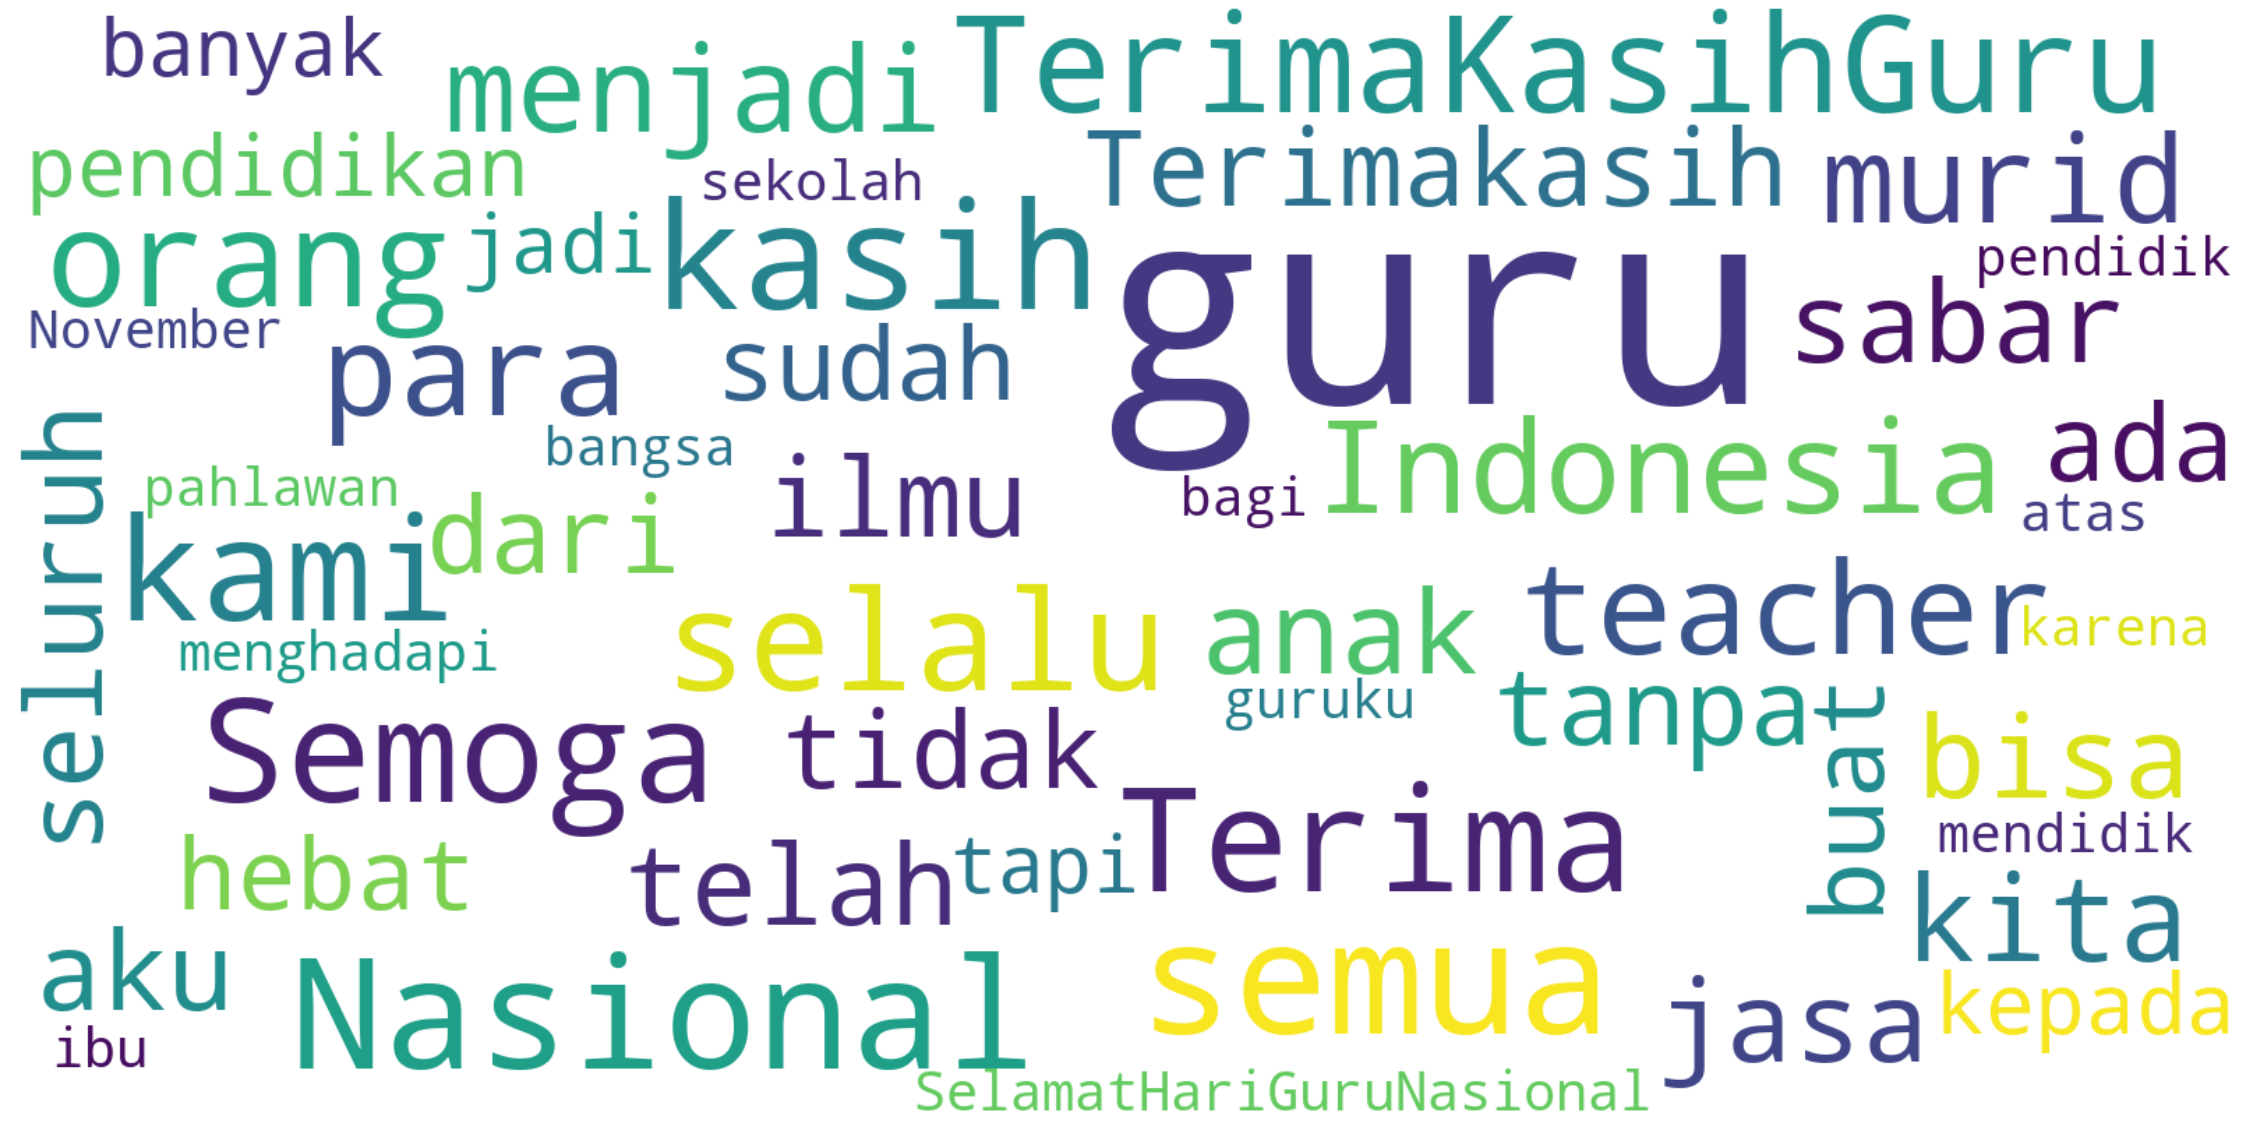

In [80]:
allWords = ' '.join([twts for twts in df['Text']])
wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      max_font_size=200,
                      max_words=50,
                      collocations=False, 
                      background_color='white').generate(allWords)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

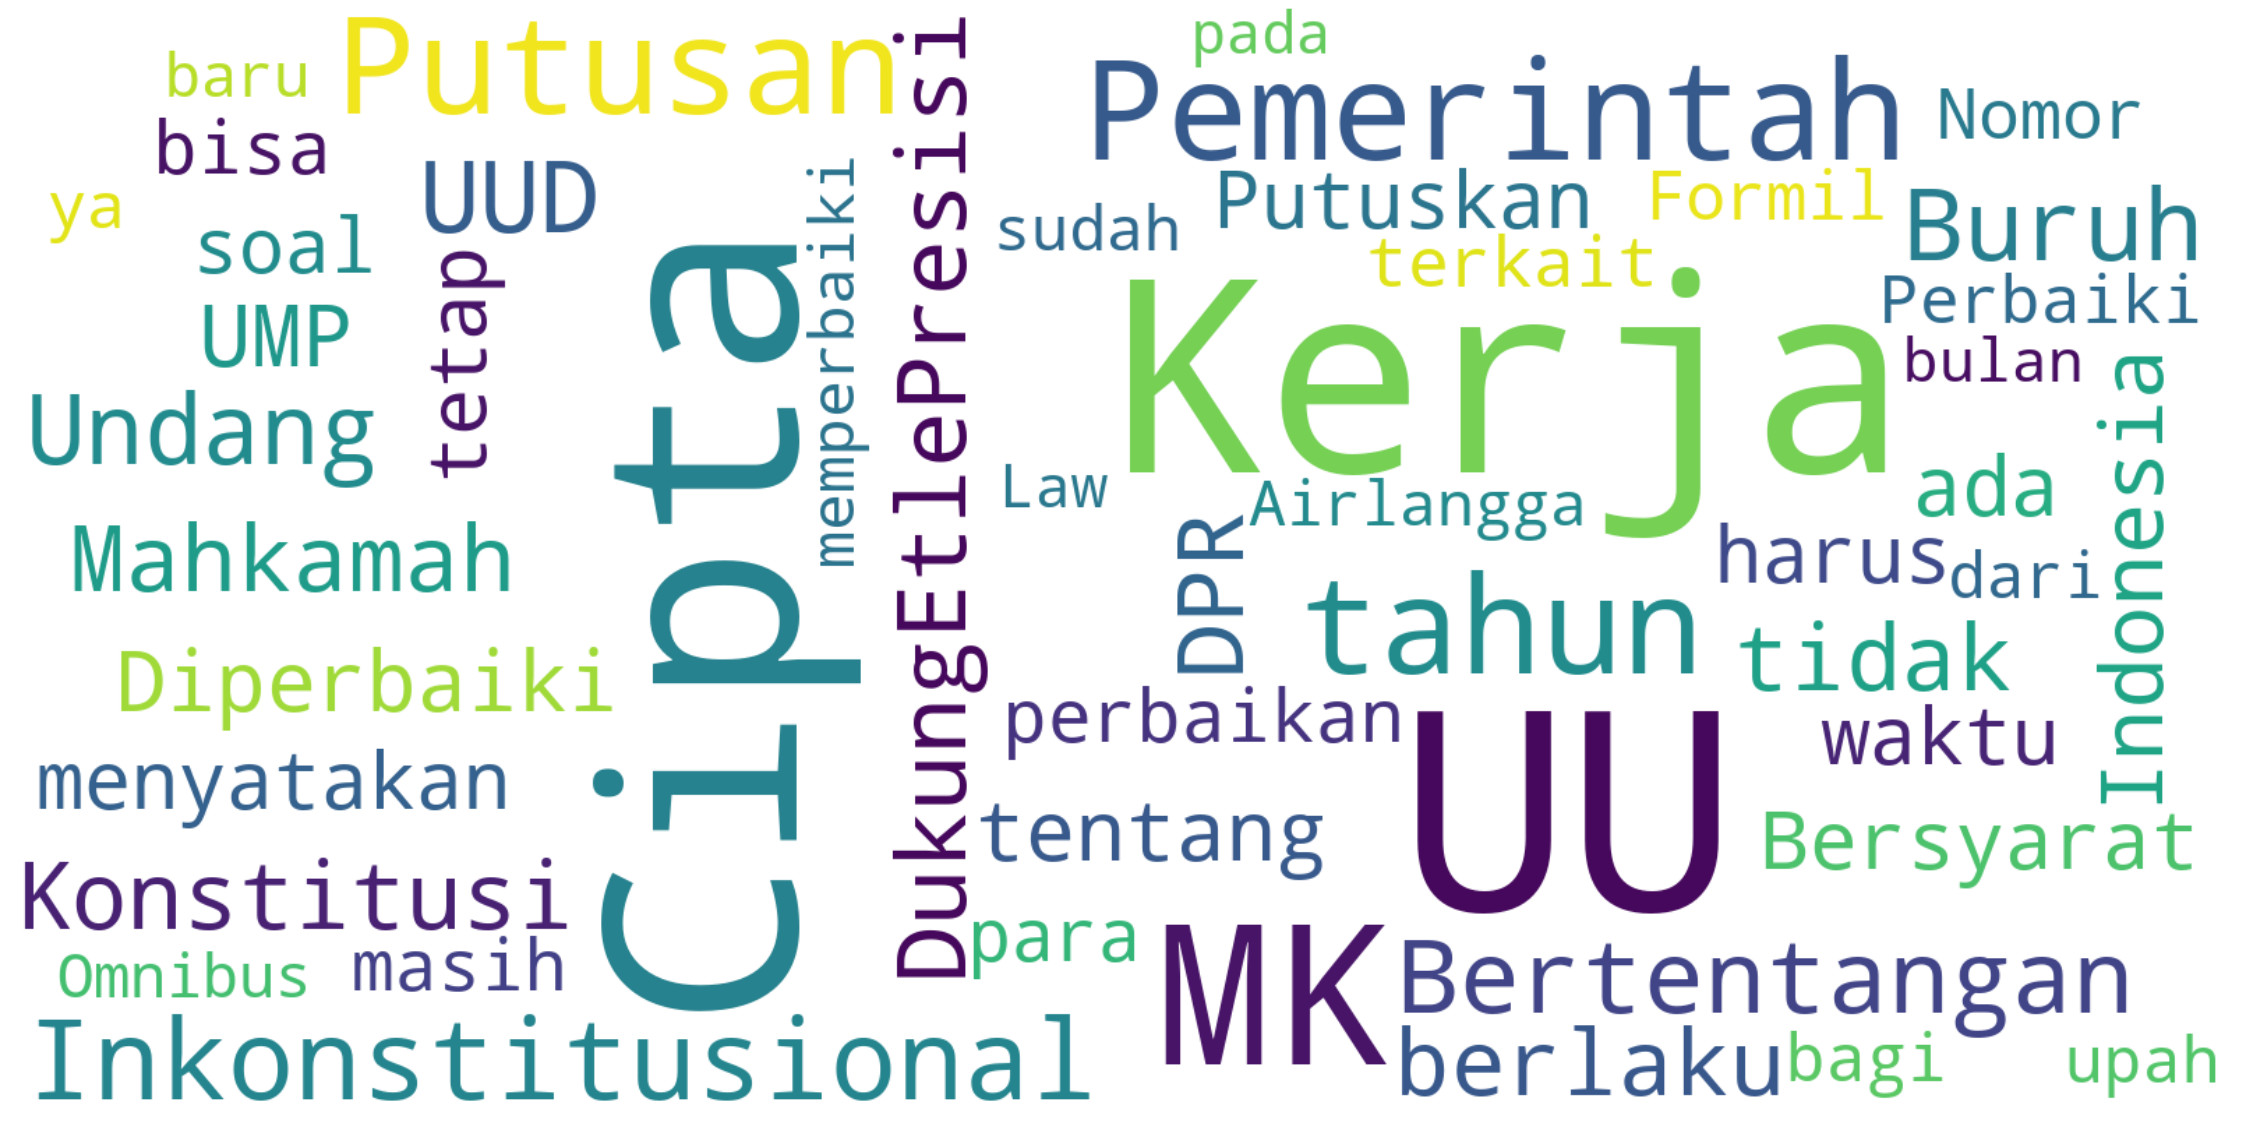

In [81]:
allWords1 = ' '.join([twts for twts in df1['Text']])
wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      max_font_size=200,
                      max_words=50,
                      collocations=False, 
                      background_color='white').generate(allWords1)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

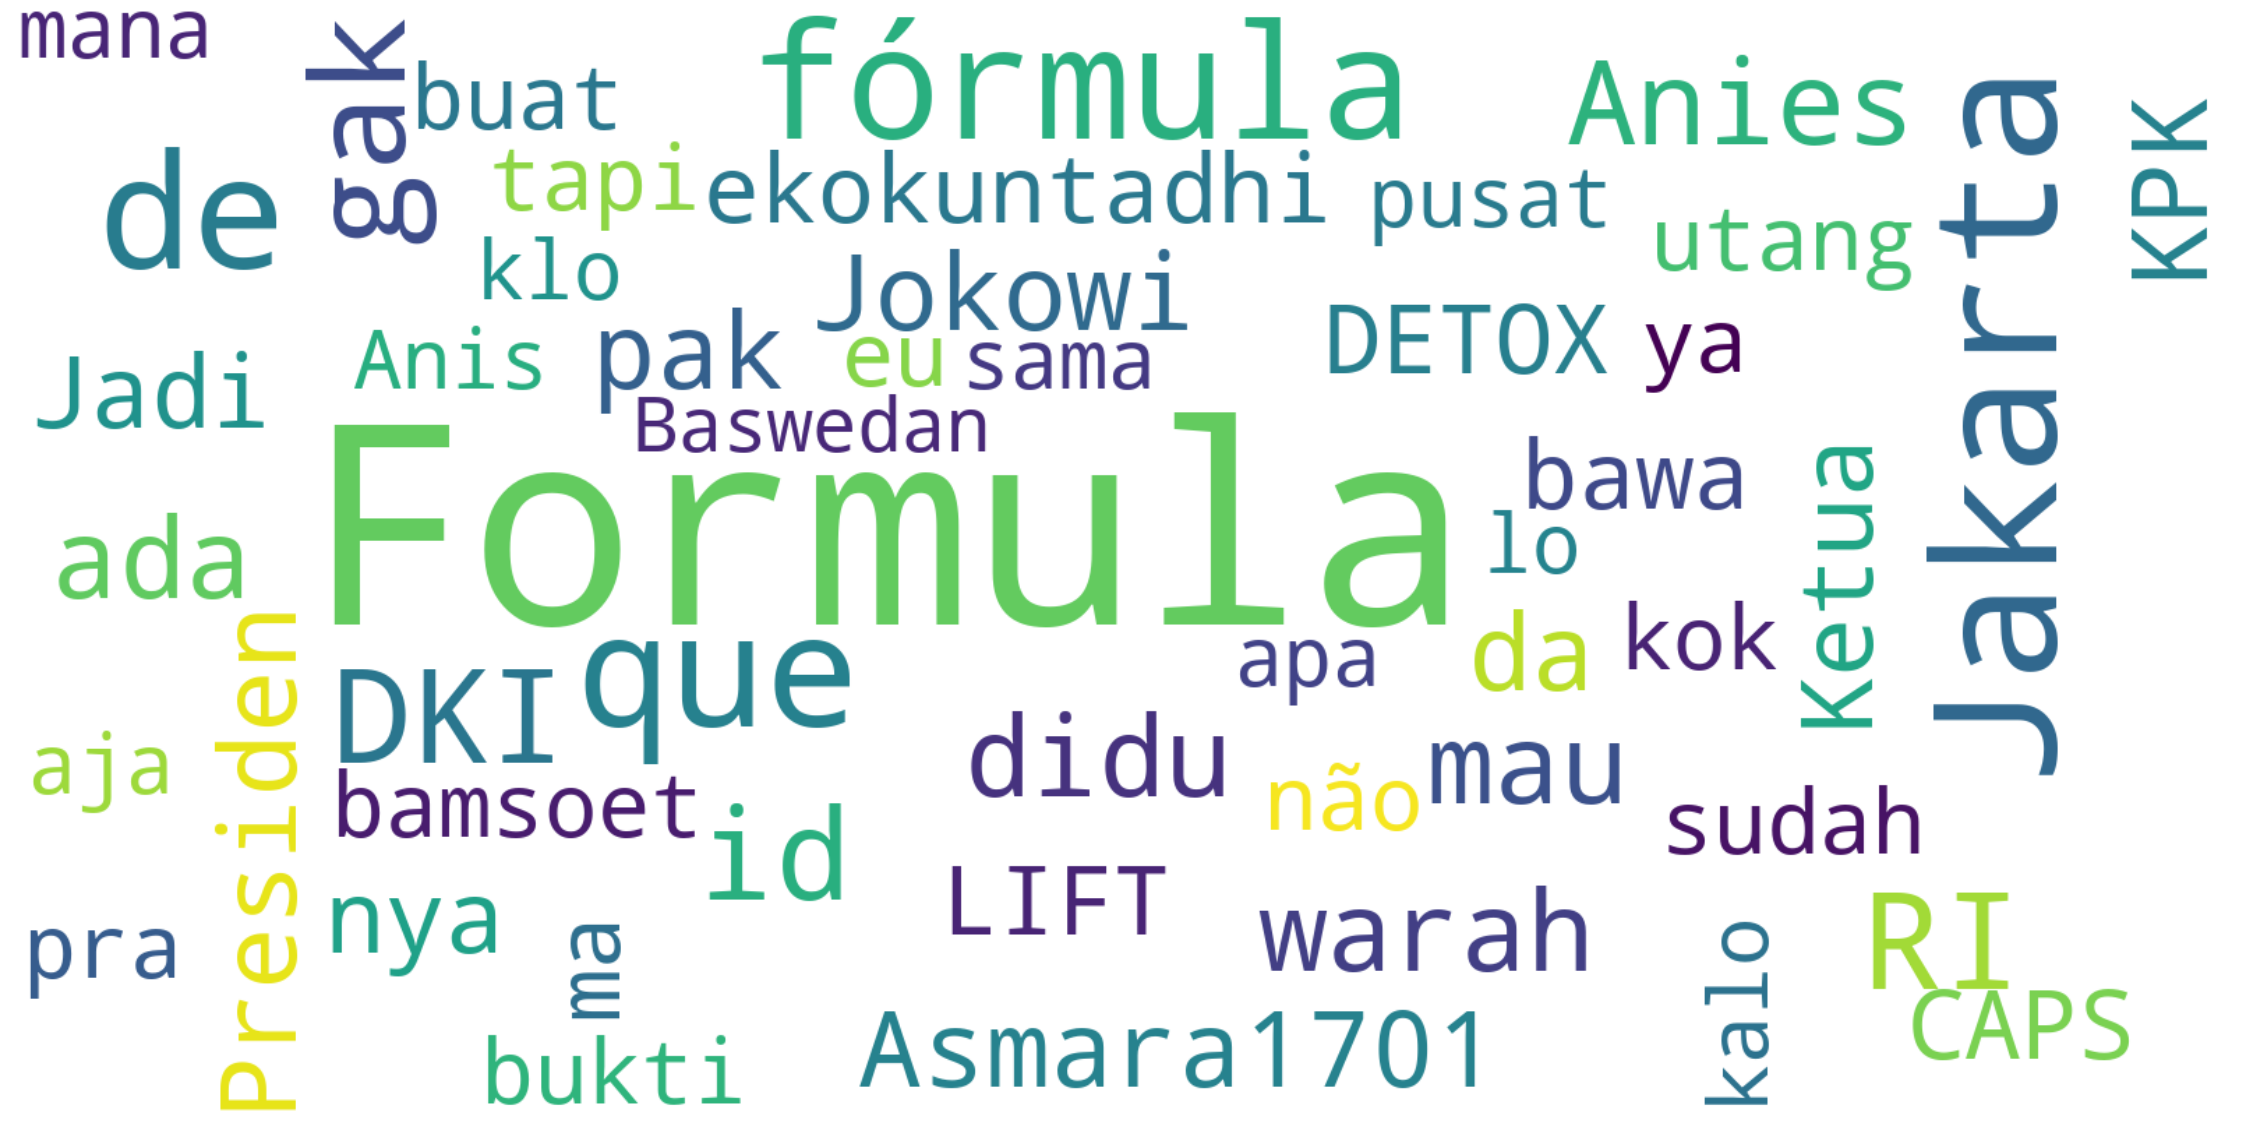

In [82]:
allWords3 = ' '.join([twts for twts in df2['Text']])
wordcloud = WordCloud(width=1600, 
                      stopwords=stopwords,
                      height=800,
                      max_font_size=200,
                      max_words=50,
                      collocations=False, 
                      background_color='white').generate(allWords3)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()